In [1]:
#Importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import MinMaxScaler,StandardScaler 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.utils import class_weight

In [2]:
#loading the dataset
df=pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
#showing the dataset
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
#getting the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
#check for null value in the dataset
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

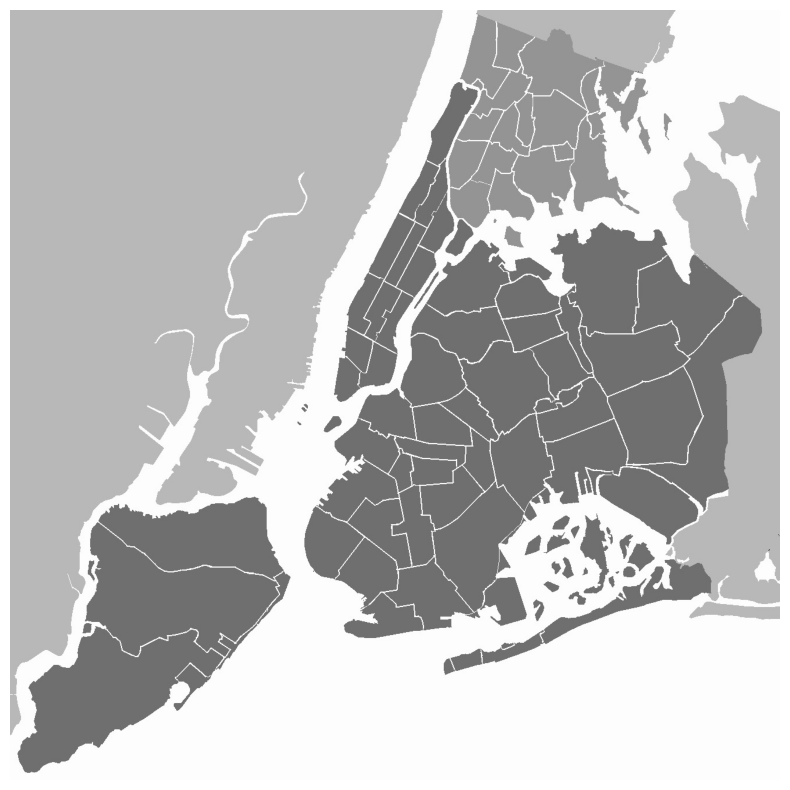

In [5]:
#showing image with .open method
img=Image.open('/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png')
#creating the figure size
plt.figure(figsize=(12,10))

plt.axis('off')
plt.imshow(img,extent=(0,1,0,1))
plt.show()

In [6]:
#creating dataframe for only coordinates
coords=df.loc[:,['longitude','latitude']]
#scaling coords with min max scaler
scaler=MinMaxScaler()
coords=pd.DataFrame(scaler.fit_transform(coords),columns=coords.columns)
coords

,longitude,latitude
0,0.511921,0.357393
1,0.490469,0.614199
2,0.569257,0.748252
3,0.535649,0.448496
4,0.565324,0.722820
...,...,...
48890,0.554109,0.432502
48891,0.585684,0.488906
48892,0.556517,0.762117
48893,0.476639,0.623612


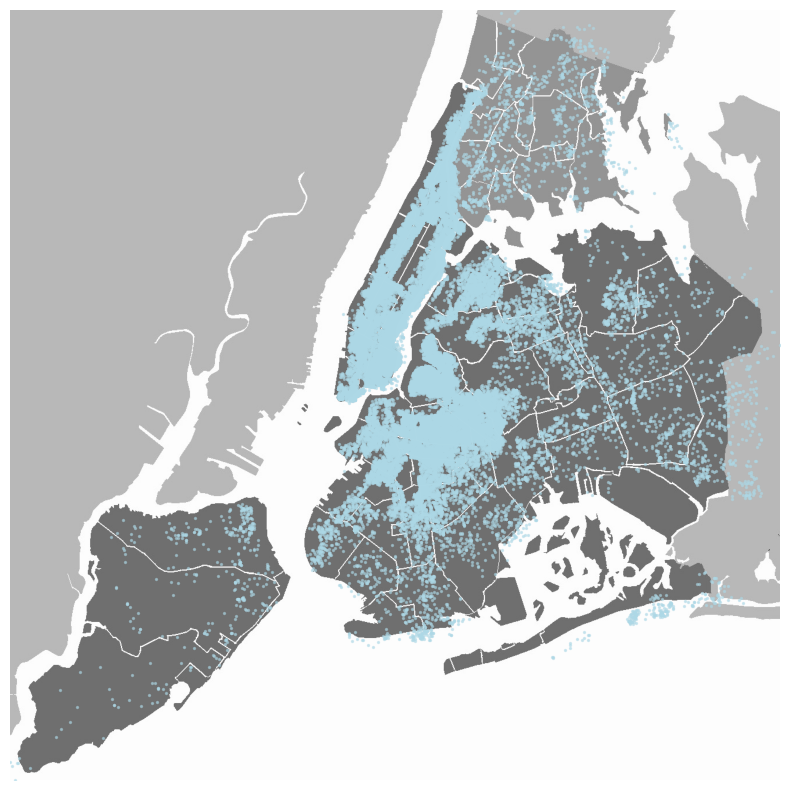

In [7]:
#showing image with .open method
img=Image.open('/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png')
#creating the figure size
plt.figure(figsize=(12,10))

plt.axis('off')
plt.imshow(img,extent=(0,1,0,1))
plt.scatter(x=coords['longitude'],y=coords['latitude'],s=2,c='lightblue',alpha=0.5)
plt.show()

In [8]:
#Cleaning the dataset
#removing unneeded columns
df.columns
#saving the name of unneeded columns into a list
UNNEEDED_COLUMNS=['id','name','host_id','host_name']
#dropping the unneeded column list
df=df.drop(UNNEEDED_COLUMNS,axis=1)
#showing the altered dataframe
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [9]:
#checking the missing  value in the dataset
df.isna().mean()

neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [10]:
#dropping last_review columns
df=df.drop('last_review',axis=1)
#filling missing value in reviews_per_month with 0
df['reviews_per_month']=df['reviews_per_month'].fillna(0)
#checking the missing values in the dataset
df.isna().sum()


neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [11]:
#Creating a label column whehter it is 365 available
#encoding the avialabiliy column with binary value 1 and 0
df['availability_365']= df['availability_365'].apply(lambda x:1 if x==365 else 0)
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,1
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,1
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,0
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,0


In [12]:
#checking the class distribution
df['availability_365'].value_counts()/len(df['availability_365'])

availability_365
0    0.973515
1    0.026485
Name: count, dtype: float64

In [13]:
#checking unique value in each categorical columns
{feature:list(df[feature].unique()) for feature in df.columns if df[feature].dtype=='object'}

{'neighbourhood_group': ['Brooklyn',
  'Manhattan',
  'Queens',
  'Staten Island',
  'Bronx'],
 'neighbourhood': ['Kensington',
  'Midtown',
  'Harlem',
  'Clinton Hill',
  'East Harlem',
  'Murray Hill',
  'Bedford-Stuyvesant',
  "Hell's Kitchen",
  'Upper West Side',
  'Chinatown',
  'South Slope',
  'West Village',
  'Williamsburg',
  'Fort Greene',
  'Chelsea',
  'Crown Heights',
  'Park Slope',
  'Windsor Terrace',
  'Inwood',
  'East Village',
  'Greenpoint',
  'Bushwick',
  'Flatbush',
  'Lower East Side',
  'Prospect-Lefferts Gardens',
  'Long Island City',
  'Kips Bay',
  'SoHo',
  'Upper East Side',
  'Prospect Heights',
  'Washington Heights',
  'Woodside',
  'Brooklyn Heights',
  'Carroll Gardens',
  'Gowanus',
  'Flatlands',
  'Cobble Hill',
  'Flushing',
  'Boerum Hill',
  'Sunnyside',
  'DUMBO',
  'St. George',
  'Highbridge',
  'Financial District',
  'Ridgewood',
  'Morningside Heights',
  'Jamaica',
  'Middle Village',
  'NoHo',
  'Ditmars Steinway',
  'Flatiron Distr

In [14]:
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,1
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,1
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,0
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,0


In [15]:
#creating onehot function
def onehot_encode(df,columns,prefixes):
    #creating copy of the dataset
    df=df.copy()
    #looping through the columns in the dataset
    for column,prefix in zip(columns,prefixes):
        #creating dummies of the columns
        dummies=pd.get_dummies(df[column],prefix=prefix)
        #concating the dummies feature with original dataframe
        df=pd.concat([df,dummies],axis=1)
        #dropping the original columns
        df=df.drop(column,axis=1)
    return df
        

In [16]:
df=onehot_encode(df,columns=['neighbourhood_group','neighbourhood','room_type'],prefixes=['g','n','r'])
df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,g_Bronx,g_Brooklyn,...,n_Williamsburg,n_Willowbrook,n_Windsor Terrace,n_Woodhaven,n_Woodlawn,n_Woodrow,n_Woodside,r_Entire home/apt,r_Private room,r_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,1,False,True,...,False,False,False,False,False,False,False,False,True,False
1,40.75362,-73.98377,225,1,45,0.38,2,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,40.80902,-73.94190,150,3,0,0.00,1,1,False,False,...,False,False,False,False,False,False,False,False,True,False
3,40.68514,-73.95976,89,1,270,4.64,1,0,False,True,...,False,False,False,False,False,False,False,True,False,False
4,40.79851,-73.94399,80,10,9,0.10,1,0,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,0.00,2,0,False,True,...,False,False,False,False,False,False,False,False,True,False
48891,40.70184,-73.93317,40,4,0,0.00,2,0,False,True,...,False,False,False,False,False,False,False,False,True,False
48892,40.81475,-73.94867,115,10,0,0.00,1,0,False,False,...,False,False,False,False,False,False,False,True,False,False
48893,40.75751,-73.99112,55,1,0,0.00,6,0,False,False,...,False,False,False,False,False,False,False,False,False,True


In [17]:
#looping through the columns
for column in df.columns:
    #converting into integer if it is boolean columns
    if df[column].dtype=='bool':
        df[column]=df[column].astype('int')
df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,g_Bronx,g_Brooklyn,...,n_Williamsburg,n_Willowbrook,n_Windsor Terrace,n_Woodhaven,n_Woodlawn,n_Woodrow,n_Woodside,r_Entire home/apt,r_Private room,r_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,0.00,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.64,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,0.00,2,0,0,1,...,0,0,0,0,0,0,0,0,1,0
48891,40.70184,-73.93317,40,4,0,0.00,2,0,0,1,...,0,0,0,0,0,0,0,0,1,0
48892,40.81475,-73.94867,115,10,0,0.00,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48893,40.75751,-73.99112,55,1,0,0.00,6,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
#Splitting the dataset into target and features

y=df['availability_365'].copy()
x=df.drop('availability_365',axis=1)
#creating a instance of the StandarScaler()
scaler=StandardScaler()
#scaling the features 
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns,index=x.index)
x

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,g_Bronx,g_Brooklyn,g_Manhattan,...,n_Williamsburg,n_Willowbrook,n_Windsor Terrace,n_Woodhaven,n_Woodlawn,n_Woodrow,n_Woodside,r_Entire home/apt,r_Private room,r_Shared room
0,-1.493849,-0.437652,-0.015493,-0.293996,-0.320414,-0.551511,-0.034716,-0.151071,1.196705,-0.891833,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,-1.040134,1.090893,-0.155887
1,0.452436,-0.684639,0.300974,-0.293996,0.487665,-0.445079,-0.156104,-0.151071,-0.835628,1.121286,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,0.961415,-0.916680,-0.155887
2,1.468399,0.222497,-0.011329,-0.196484,-0.522433,-0.682986,-0.186451,-0.151071,-0.835628,1.121286,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,-1.040134,1.090893,-0.155887
3,-0.803398,-0.164450,-0.265335,-0.293996,5.538156,2.221978,-0.186451,-0.151071,1.196705,-0.891833,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,0.961415,-0.916680,-0.155887
4,1.275660,0.177216,-0.302811,0.144807,-0.320414,-0.620379,-0.186451,-0.151071,-0.835628,1.121286,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,0.961415,-0.916680,-0.155887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,-0.924616,0.048089,-0.344452,-0.245240,-0.522433,-0.682986,-0.156104,-0.151071,1.196705,-0.891833,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,-1.040134,1.090893,-0.155887
48891,-0.497141,0.411637,-0.469373,-0.147729,-0.522433,-0.682986,-0.156104,-0.151071,1.196705,-0.891833,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,-1.040134,1.090893,-0.155887
48892,1.573480,0.075821,-0.157070,0.144807,-0.522433,-0.682986,-0.186451,-0.151071,-0.835628,1.121286,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,0.961415,-0.916680,-0.155887
48893,0.523774,-0.843881,-0.406912,-0.293996,-0.522433,-0.682986,-0.034716,-0.151071,-0.835628,1.121286,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,-1.040134,-0.916680,6.414894


In [19]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(34226, 236)
(14669, 236)
(34226,)
(14669,)


In [20]:
#Constructing the Model
inputs=tf.keras.Input(shape=(236,),name='input_layer')
hidden_1=tf.keras.layers.Dense(64,activation='relu',name='hidden_1')(inputs)
hidden_2=tf.keras.layers.Dense(64,activation='relu',name='hidden_2')(hidden_1)
outputs=tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer')(hidden_2)

model=tf.keras.Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 236)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_1 (Dense)                │ (None, 64)             │        15,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,393 (75.75 KB)

 Trainable params: 19,393 (75.75 KB)

 Non-trainable params: 0 (0.00 B)